# Economic Effects of a Year-Long Lockdown
## End-of-Term Assessment
## Andres Perez Martinez

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.linalg import matrix_power  
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  
import quantecon as qe
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.tsa.ar_model import AutoReg
from fredapi import Fred
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from numpy.linalg import inv


### This problem set is in lieu of a final.  It will count for thirty points. 

### 0.- Import the Weekly Economic Index from FRED

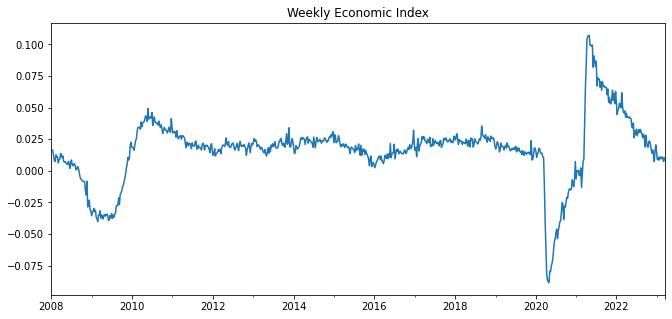

In [2]:
# Acess The FRED Data
fred = Fred(api_key='6c0ecd6565503b64631fd2b36f71293a')

# Create The Weekly Economic Index Series
WEI = fred.get_series('WEI')/100

# Plot And Label The Weekly Economic Index 
WEI.plot(title = "Weekly Economic Index")

# Make The Weekly Economic Index Data Frame
WEI_DF = pd.DataFrame(WEI, columns = ['WEI'])

### 1.- Plot and make a histogram with twenty bins.  Each bin will be a state.  The lowest bin is the Covid state; it only has 6 observations. (2 points)

The edges of the bins  are: [-0.0883  -0.07853 -0.06876 -0.05899 -0.04922 -0.03945 -0.02968 -0.01991
 -0.01014 -0.00037  0.0094   0.01917  0.02894  0.03871  0.04848  0.05825
  0.06802  0.07779  0.08756  0.09733  0.1071 ]

The number of states in each bin is: [6, 3, 2, 3, 8, 35, 15, 16, 18, 58, 224, 274, 57, 27, 14, 15, 5, 5, 1, 8]

Nice, all is well with the count data.


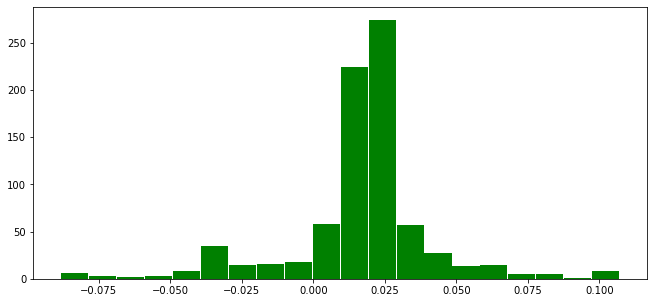

In [3]:
# Creates The Histogram
(counts,bins,patches) = plt.hist(WEI_DF['WEI'], bins=20, color="green", rwidth=0.97)  #rwidth is how close each bar is

print("The edges of the bins  are:", bins)
print("")
print("The number of states in each bin is:", [int(x) for x in counts])
print("")

# Check if data is complete
if np.sum(counts) != len(WEI):
    print("Sadly.... some data lost. ASAP re-check.")
else:
    print("Nice, all is well with the count data.")

### 2.- Classify the States (2 points)

In [4]:
# Number of States
state_numbers = list(range(len(bins)-1)) 

# Name of States 
state_names = ["State_1", "State_2", "State_3", "State_4",
               "State_5", "State_6", "State_7", "State_8", "State_9", "State_10", 
               "State_11","State_12","State_13","State_14","State_15","State_16",
               "State_17","State_18","State_19","State_20"]

# Function That Classifies Each Value Into A State
def classify(x,bins,states):
    """
    x is the data
    bins gives the break points
    states are the names of the states
    """
    n=len(bins) 
    conditions = []
    for i in range(n-1): 
        conditions.append((x <= bins[i+1]) & (x >= bins[i]))
    return(np.select(conditions, states))

WEI_DF.insert(1,"State Numbers", classify(WEI_DF['WEI'],bins,state_numbers))

###  3.- Estimate the Markov matrix, and show its ergodic distribution  Report the long-run probability of being in a Covid state. (2 points)

In [5]:
# Firstly, create a contingency table to count the number of transitions between states
WEI_DF["state"] = classify(WEI_DF["WEI"], bins, state_numbers) # add "state" information as a new column to WEI dataframe.


# display(df_WEI)
WEI_DF["next_state"] = WEI_DF["state"].shift(-1) # add column for "next_state"

# "crosstab" function computes a simple cross-tabulation of two (or more) factors.
# By default, computes a frequency table of the factors unless an array of values and an aggregation function are passed.
state_counts = pd.crosstab(WEI_DF["state"], WEI_DF["next_state"], margins=True)

# Calculate the transition probabilities by dividing the number of transitions by the total number of observations in each state.
state_probs = state_counts.iloc[:-1, :-1].div(state_counts.iloc[:-1, -1], axis=0)
display(state_probs)

# Convert the resulting dataframe into a Markov matrix
Markov_matrix = state_probs.values
print("The Markov matrix is: \n", Markov_matrix)

next_state,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
state,,,,,,,,,,,,,,,,,,,,
0,0.833333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000
1,0.000000,0.666667,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000
2,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000
3,0.000000,0.000000,0.000000,0.333333,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000
4,0.000000,0.000000,0.125000,0.125000,0.500000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000
5,0.000000,0.000000,0.000000,0.000000,0.028571,0.885714,0.085714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,0.733333,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000
7,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.625000,0.312500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.111111,0.555556,0.277778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000


The Markov matrix is: 
 [[0.83333333 0.16666667 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.66666667 0.33333333 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.5        0.         0.         0.5        0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.33333333 0.66666667 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.125      0.125      0.5        0.25
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        

The ergodic distribution of states is: 
 [[0.0075662  0.0037831  0.00252207 0.0037831  0.01008827 0.04413619
  0.01891551 0.02017654 0.02269861 0.07313997 0.28121059 0.34552333
  0.07187894 0.03404792 0.01765448 0.01891551 0.00630517 0.00630517
  0.00126103 0.01008827]]


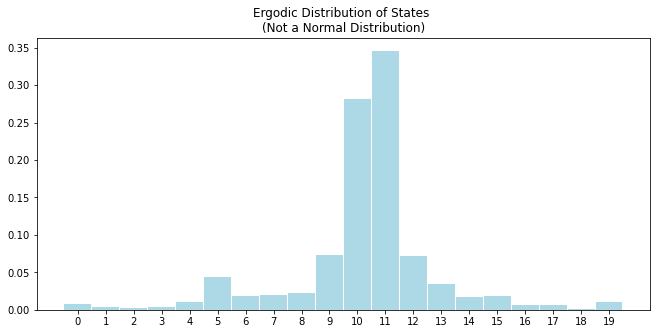

We can see that, in this case, the probability of being in state 0 (Covid state) in the long run is 0.00757576.


In [6]:
# In order to do the ergodic distribution we use qe package for markov chain
mc = qe.MarkovChain(Markov_matrix) 

print("The ergodic distribution of states is: \n", mc.stationary_distributions)  # Show all stationary distributions

ERG = mc.stationary_distributions
plt.bar(range(len(ERG[0])), ERG[0], color="lightblue", width=0.95)  #It'll show up to 19 because index starts at 0 
plt.xticks(range(len(ERG[0])))
plt.title("Ergodic Distribution of States \n"
        "(Not a Normal Distribution)")
plt.show()

print("We can see that, in this case, the probability of being in state 0 (Covid state) in the long run is 0.00757576.")

### 4.- Calculate the consumption vector as follows,  First, find the the average value within each bin.  Then raise e to the power of those twenty numbers. (2 points)

In [7]:
# Group the data by state and find/calculate each average value
grouped_data = WEI_DF.groupby(by="state").mean()
grouped_data.sort_values("WEI", ascending=True, inplace=True)
# display(grouped_data)

mean_growth_rate = grouped_data["WEI"]
print("Mean Growth Rate:\n", mean_growth_rate)

Mean Growth Rate:
 state
0    -0.083883
1    -0.072300
2    -0.061050
3    -0.054333
4    -0.043350
5    -0.034894
6    -0.025533
7    -0.014650
8    -0.005956
9     0.005881
10    0.015471
11    0.023024
12    0.033158
13    0.042648
14    0.053029
15    0.064560
16    0.071880
17    0.084280
18    0.090800
19    0.102637
Name: WEI, dtype: float64


In [8]:
# Create consumption vector, raise e to the power.
cons = np.array(mean_growth_rate)
cons = np.exp(cons)
cons

array([0.91953853, 0.93025178, 0.9407762 , 0.94711635, 0.95757618,
       0.9657075 , 0.97478989, 0.98545679, 0.99406214, 1.00589836,
       1.01559173, 1.02329156, 1.03371374, 1.04357065, 1.05445977,
       1.06668958, 1.07452639, 1.08793347, 1.09504997, 1.10808965])

### 5.- The representative agent has this felicity function:

$$
u(c)=\frac{c^{1-\rho}-1}{1-\rho}
$$


### with $\rho=2$. The representative agent has this discount factor $\beta=0.97^\frac{1}{52}$. Calculate the asset pricing kernel. Explain why the diagonal elements are all the same. Explain also why the matrix is not symmetric. Explain how the kernel depends upon the Markov matrix.   (4 points)

In [9]:
# Define the parameters
c = cons
β = 0.97**(1/52) # Financial index usually quoted in percent per year vs. WEI is weekly transitions, so the actual discount factor should be 𝛽**1/52
γ = 2

def kern(c0, c, γ):
    """
    This function returns a vectir of Margima rates of substitution 
    Its shape is 1 x n
    c0 is current consumption, a scalar
    c1is list of future consumptions
    γ is the inter-temporal elasticity of substitution
    """
    if γ == 1:
        # return np.true_divide(1,c1)/(1/c0)
        return np.true_divide(1,c)/(1/c0)
    else: 
        # return np.power(c1,-γ)/c0**(-γ)
        return np.power(c,-γ)/c0**(-γ)
    
def mkern(c,β,γ):
    """
    This method gets the matrix of Arrow security prices
    K(i,j) is the price of Arrow security j, when one is in state i
    """
    n = len(c) # number of states
    K = np.zeros((n,n)) # start with an array of zeros
    for i in range (n):
        K[i,:] = β*kern(c[i],c,γ)  # each row is an asset pricing kernel for consumption in state i
    return(K)

K = mkern(c,β,γ)
#print(K)

dafr = pd.DataFrame()
for i in range(len(K)):
    dafr[state_names[i]] = K[i]
    
print(dafr)

     State_1   State_2   State_3   State_4   State_5   State_6   State_7  \
0   0.999414  1.022838  1.046113  1.060260  1.083808  1.102293  1.123124   
1   0.976527  0.999414  1.022156  1.035980  1.058989  1.077050  1.097404   
2   0.954801  0.977179  0.999414  1.012930  1.035427  1.053087  1.072988   
3   0.942061  0.964140  0.986079  0.999414  1.021611  1.039035  1.058671   
4   0.921592  0.943192  0.964654  0.977700  0.999414  1.016460  1.035669   
5   0.906138  0.927375  0.948478  0.961305  0.982655  0.999414  1.018302   
6   0.889331  0.910174  0.930885  0.943475  0.964429  0.980878  0.999414   
7   0.870182  0.890577  0.910842  0.923160  0.943663  0.959758  0.977896   
8   0.855182  0.875225  0.895140  0.907246  0.927396  0.943213  0.961038   
9   0.835175  0.854749  0.874198  0.886021  0.905699  0.921146  0.938554   
10  0.819308  0.838510  0.857590  0.869188  0.888493  0.903646  0.920724   
11  0.807024  0.825939  0.844733  0.856157  0.875172  0.890098  0.906920   
12  0.790833

#### Interpretation:


##### Explain also why the matrix is not symmetric.

The diagonal elements are all the same ${ $0.99941442 }$. This is because we give that value in every single state because we want to make sure we get $1.0 in the next state. 

##### Explain why the matrix is not symmetric

A felicity function is a mathematical function that quantifies the degree of agreement between two sets of observations. A matrix is said to be symmetric if it is equal to its own transpose. In this case (a felicity function case), it is possible for the matrix to not be symmetric. This is because the matrix is typically constructed based on the disagreement between the observed values and the predicted values. If the observations and predictions are not the same, then the resulting matrix may not be symmetric. In a felicity function, the matrix may not be symmetric because it reflects the degree of disagreement between two sets of observations, which may not be the same in both directions.

##### Explain how the kernel depends upon the Markov matrix.

The relationship between the kernel function and the Markov matrix is that the kernel function can be computed from the Markov matrix using a technique called the spectral decomposition. Specifically, if we diagonalize the Markov matrix using the eigendecomposition, then the kernel function can be expressed as a sum of weighted eigenvectors.
Basically, the kernel function is a weighted sum of the eigenvectors of the Markov matrix, where the weights are determined by the eigenvalues. The eigenvectors represent the features in the higher-dimensional space, and the kernel function measures the similarity between observations based on their projection onto these features.


Reference: https://people.math.harvard.edu/~knill/teaching/math19b_2011/handouts/lecture33.pdf

### 6.- Here is an array of maturities [1, 2, 4, 8, 20, 40, 80, 120] in quarters.  Make a diagram with twenty yield curves.  Each line in your diagram should consist of a yield curve in a given state.  Remember you are working with weekly data; so a quarter consists of 13 weeks.  (2 points)

In [10]:
def pricing_T(M,K,R,T):
    """
    M is a markov matrix
    K is a pricing kernel
    R is a matrix of asset payouts.
    R is an n x m matrix.  
    There are n states and m assets.
    R(:,j) is the description of asset j
    The asset returns are by column.
    R(i,j) is what asset j pays if state i happens.
    This method returns a n x m matrix P
    P(i,j) is the price of asset j in state i
    This method prices assets that pay out in the period T only
    """
    if M.shape != K.shape:
        return('Markov matrix and pricing kernels are not conformable.')
    if M.shape[1] != R.shape[0]:
        return('Asset price matrix is not conformable.')
    M1=np.multiply(M,K) #element-by-elemnt multiplication
    P = np.matmul(np.linalg.matrix_power(M1,T), R)  
    #raise M1 to the T the right multiply by R
    return(P)

In [11]:
maturities = [1, 2, 4, 8, 20, 40, 80, 120]


R = np.ones(20)
pt = []
for i in range(len(maturities)):     #T is years 
    
    T = maturities[i] * 13
    x = pt.append((1/pricing_T(Markov_matrix,K,R,int(T)))**(1/T))

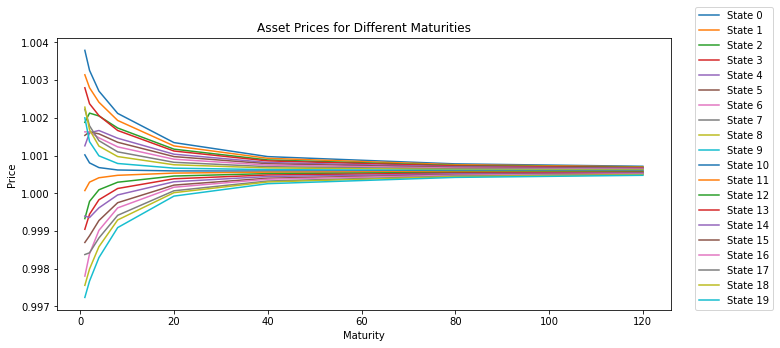

In [12]:
# Plot the prices
fig, ax = plt.subplots()
for i in range(20):                                                  # assuming there are 20 assets
    ax.plot(maturities, [p[i] for p in pt], label=f'State {i}')


ax.set_xlabel('Maturity')
ax.set_ylabel('Price')
ax.set_title('Asset Prices for Different Maturities')
ax.legend(loc=(1.04, 0))
plt.show()

### 7.-  Discuss whether an inverted yield curve conveys information about next period's state.   (2 points)

An inverted yield curve occurs when short-term interest rates are higher than long-term interest rates, indicating that the market expects lower growth and lower inflation in the future. This "event" has been observed in the past and is, most of the time, considered as a warning signal of an upcoming recession. It is important to note that an inverted yield curve does not necessarily provide definitive information about the future state of the economy. There are many factors that can influence interest rates, such as monetary policy, inflation expectations, and market sentiment, and of course these factors can change over time. Even if an inverted yield curve does accurately predict a future economic downturn, it does not necessarily provide specific information about the downturn. The yield curve should be interpreted in the context of other data and information. So, while an inverted yield curve can provide some information about the future state of the economy, it should be used with caution.

Resource used for answer: https://www.investopedia.com/terms/i/invertedyieldcurve.asp, and https://www.weforum.org/agenda/2022/12/inverted-yield-curve-signal-economy-euro-dollar/

### 8.- The stock market is an asset that pays a dividend equal to the economy's consumption in each quarter.  Price the stock market in each state.  (2 points)

In [13]:
def mkern(c,β,γ):
    """
    This method gets the matrix of Arrow security prices
    K(i,j) is the price of Arrow security j, when one is in state i
    """
    n = len(c) # number of states
    K=np.zeros((n,n)) # start with an array of zeros
    for i in range (n):
        K[i,:] = β*kern(c[i],c,γ)  # each row is an asset pricing kernel for consumption in state i
    return(K)

In [14]:
stock_values = np.linalg.inv(np.identity(20) - (mkern(cons, β, γ) * Markov_matrix))@cons
stock_values

array([1425.77372135, 1458.669732  , 1491.62824012, 1510.88871653,
       1544.3494338 , 1569.90046663, 1598.74924659, 1632.79657502,
       1660.7736615 , 1699.83505707, 1732.51327598, 1758.77902835,
       1794.46559993, 1828.40766519, 1866.0066812 , 1909.09823648,
       1937.15323878, 1984.6952969 , 2010.66279264, 2058.14015855])

### 9.- The first row of the Markov matrix was (5/6, 1/6, 0, ..., 0).  What is the expected duration of a lockdown for this matrix?  Change the first row of the matrix so that it is (p,  1-p, 0,..., 0) for 0 < p < 1 to simulate a hard 52-period lockdown.   What is the correct value of p?   Report the new long-run probability of being in a Covid state (2 points)

In [15]:
p = 5/6
exp =1/(1-p)
exp
print("The expected duration of a lockdown for the original matrix is", round(exp), "weeks")

The expected duration of a lockdown for the original matrix is 6 weeks


In [16]:
p = 51/52
mm52 = Markov_matrix
covid = (p, 1-p, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
mm52[0] = covid

mc_52 = qe.MarkovChain(mm52)
mc_52.stationary_distributions

print(mc_52.stationary_distributions)
print("The correct value for p is 51/52 and the new long-run probability of being in a Covid state is .062")

[[0.06197855 0.00357569 0.00238379 0.00357569 0.00953516 0.04171633
  0.01787843 0.01907032 0.02145411 0.06912992 0.26579261 0.32657926
  0.06793802 0.03218117 0.01668653 0.01787843 0.00595948 0.00595948
  0.0011919  0.00953516]]
The correct value for p is 51/52 and the new long-run probability of being in a Covid state is .062


### 10.- Simulate and graph the time series of consumption and the stock market for 1300 periods  in the two different scenarios, the status quo and an immediate year-long lockdown.   You should multiply consumption by 1500 to put it on the same scale as the stock market.  (2 points)

In [17]:
# Define the Markov matrix
P = Markov_matrix
# Define the state values for consumption and the stock market price
C = cons * 1500
P_stock = stock_values

# Set the number of periods to simulate
T = 1300

# Initialize the arrays for consumption and the stock market price
c = np.zeros(T)
p = np.zeros(T)

# Set the initial state of the economy
this_week = 0

# Create the Markov Chain and simulate the state of the economy over time
mc = qe.MarkovChain(P, state_values=C)
X = mc.simulate_indices(ts_length=T, init=this_week)

# Calculate consumption and the stock market price for each period
for t in range(T):
    # Calculate the level of consumption using the current state of the economy
    c[t] = C[X[t]]
    
    # Calculate the stock market price using the current state of the economy
    p[t] = P_stock[X[t]]

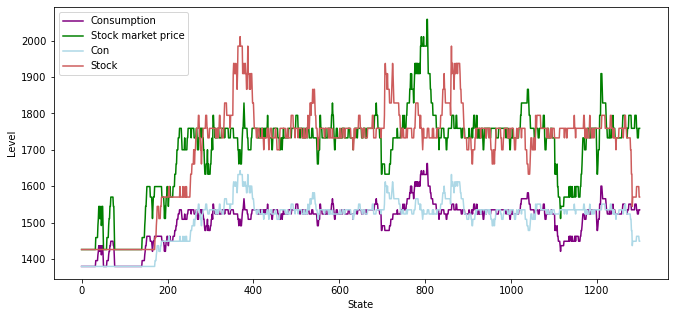

In [18]:
# Define the Markov matrix
P = mm52
# Define the state values for consumption and the stock market price
C = cons * 1500
P_stock = stock_values

# Set the number of periods to simulate
T = 1300

# Initialize the arrays for consumption and the stock market price
sc = np.zeros(T)
sp = np.zeros(T)

# Set the initial state of the economy
this_week = 0

# Create the Markov Chain and simulate the state of the economy over time
mc = qe.MarkovChain(P, state_values=C)
X = mc.simulate_indices(ts_length=T, init=this_week)

# Calculate consumption and the stock market price for each period
for t in range(T):
    # Calculate the level of consumption using the current state of the economy
    sc[t] = C[X[t]]
    
    # Calculate the stock market price using the current state of the economy
    sp[t] = P_stock[X[t]]

# Graph the time series of consumption and the stock market price
plt.plot(range(T), c, label='Consumption', color = "purple")
plt.plot(range(T), p, label='Stock market price', color = "green")
plt.plot(range(T), sc, label='Con', color = "lightblue")
plt.plot(range(T), sp, label='Stock', color = "indianred")
plt.xlabel('State')
plt.ylabel('Level')
plt.legend()
plt.show()


### 11.- Calculate the welfare loss from an immediate 52-period lockdown as the percentage decrease in long-run average consumption, when comparing an immediate 52-period lockdown with the status quo.  You might want to consider a Rawlsian criterion for welfare loss also; such a criterion would focus on the probability of being in the worst state.    Use Sargent's code for the SEIR model to see if a year-long-lockdown actually decreases deaths in the United States in the long run.  You should calibrate it to fit the current death total of 1.1m people.  
### Using this article     https://www.pnas.org/content/117/36/22035  explain if a year-long lockdown was worth it.  There are other articles that I have recommended to you that help one to think about the value of a human life.  (8 points)



In [19]:
pop_size = 3.3e8


from scipy.integrate import odeint
# initial conditions
i_0 = 25_000 / pop_size
e_0 = 75_000 / pop_size
s_0 = 1 - i_0 - e_0
x_0 = s_0, e_0, i_0
γ = 1 / 18
σ = 1 / 5.2

t_length = 730
grid_size = 1000
t_vec = np.linspace(0, t_length, grid_size)


In [20]:
def F(x, t, R0=1.6):
    """
    Time derivative of the state vector.

        * x is the state vector (array_like)
        * t is time (scalar)
        * R0 is the effective transmission rate, defaulting to a constant

    """
    s, e, i = x

    # New exposure of susceptibles
    β = R0(t) * γ if callable(R0) else R0 * γ
    ne = β * s * i

    # Time derivatives
    ds = - ne
    de = ne - σ * e
    di = σ * e - γ * i

    return ds, de, di

In [21]:
def solve_path(R0, t_vec, x_init=x_0):
    """
    Solve for i(t) and c(t) via numerical integration,
    given the time path for R0.

    """
    G = lambda x, t: F(x, t, R0)
    s_path, e_path, i_path = odeint(G, x_init, t_vec).transpose()

    c_path = 1 - s_path - e_path       # cumulative cases
    return i_path, c_path



def plot_paths(paths, labels, times=t_vec):

    fig, ax = plt.subplots()

    for path, label in zip(paths, labels):
        ax.plot(times, path, label=label)

    ax.legend(loc='upper left')

    plt.show()

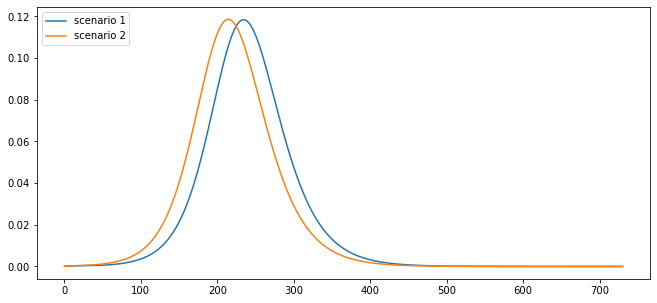

In [22]:
R0_paths = (lambda t: 1.55 if t < 52 else 2,
            lambda t: 1.55 if t < 4 else 2)


labels = [f'scenario {i}' for i in (1, 2)]

i_paths, c_paths = [], []

for R0 in R0_paths:
    i_path, c_path = solve_path(R0, t_vec, x_init=x_0)
    i_paths.append(i_path)
    c_paths.append(c_path)
    
    
plot_paths(i_paths, labels)

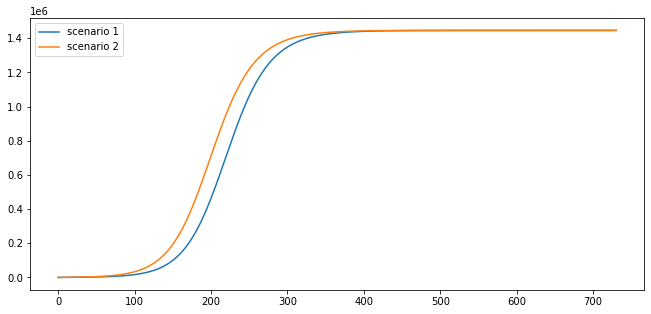

1446393.6531417964

In [23]:
ν = 1.1/(200)


paths = [path * ν * pop_size for path in c_paths]
plot_paths(paths, labels)
np.max(paths[1])


In [24]:
np.max(paths[1])

1446393.6531417964

The effects of a year long lockdown on a population vary depending on the age group you belong to. We all know that Covid-19 is a virus that is far more dangerous for older people than it is for younger poeple. It is obvious that a virus like Covid-19 will have an effect on life expectancy but, Is it significant enough to make the year long lockdown worth it for the population? Well even with all the deaths by the virus we see little to no changes to life expectancy, in the article *Demographic perspectives on the mortality of COVID-19 and other epidemics* Joshua R. Goldstein and Ronald D. Lee explain, "How could such an enormous loss of lives produce such a seemingly small loss of remaining life expectancy? Two factors play a role. First, even with substantial additional COVID-19 mortality, death will still be a statistically rare event. Most people will survive and they will, if mortality returns to normal, have many years of life ahead of them. Second, those who die of COVID-19 are older and have on average fewer years of remaining life expectancy than the average person (11.7 y instead of 45.8 y)." This clearly shows that the only population whose life expectancy was affected is old people which already have a low life expectancy. Many would say a lockdown to save those lives is not worth it since it affects almost every aspect of every-day-life for the entire population of the country.It sounds strange but, it is important to note that the value of a human life varies in different countries depending on their GDP per capita. A country with high GDP, like the United States, might value the life of a good healthy human far more than a developing country with a much lower GDP. This is due to the price the citizens are willing to pay for a good year in good health, according to the article *Putting a Dollar Value on Life? Governments Already Do* Austin Frakt states, "The values vary considerably, some as low as $\$10,000$. A study published in 2008 put the figure as high as $\$297,000$; other assessments approach $1 million." At the end of the day, everyone is going to have a different opinion on a 1-year lockdown as it depends a lot on who your situation and views on how to deal with Covid-19. For example, somebody whose job is greatly affected by the lockdown (i.e. cannot be done through a computer) or who does not care about the virus will probably not want a lockdown in place. And even though I think the lockdown helped save lives and stop the spread of the virus, it is all about perspective.  

Frakt, Austin. “Putting a Dollar Value on Life? Governments Already Do.” The New York Times, The New York Times, 11 May 2020, https://www.nytimes.com/2020/05/11/upshot/virus-price-human-life.html. 

RD;, Goldstein JR;Lee. “Demographic Perspectives on the Mortality of Covid-19 and Other Epidemics.” Proceedings of the National Academy of Sciences of the United States of America, U.S. National Library of Medicine, 20 Aug. 2020, https://pubmed.ncbi.nlm.nih.gov/32820077/. 

### Thank you Dr. Fisher! I enjoyed this class a lot.